<a href="https://colab.research.google.com/github/christophergaughan/sample-work/blob/master/TensorFlow_Deep_Learning/00_TensorFlow_fundamnetals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Creating Tensors with Tensorflow

* In this notebook we are going to cover some of the most fundamental concepts of tensors using TensorFlow.
* More specifically we're going to cover:
    * Introduction to tensors
    * Manipulating tensors
    * Tensors and NumPy
    * Using @tf.function (a way to spoeed up your regular python functions
    * Using GPU's and TPU's with TensorFlow
    * Exercises
    

# Introduction to tensors

## What is a tensor?

> A tensor is a mathematical object that generalizes the concepts of scalars, vectors, and matrices to higher dimensions. It is used extensively in physics, engineering, and computer science, especially in the context of deep learning and machine learning.

Here's a breakdown of tensors in increasing order of dimensions:

1. **Scalar**: A single number. For example, a=7. This can be thought of as a 0-dimensional tensor.
2. **Vector**: A one-dimensional array of numbers. For instance, [2,4,6] is a vector. It can be considered as a 1-dimensional tensor.
3. **Matrix**: A two-dimensional array of numbers. It can be visualized as a table of numbers with rows and columns. A matrix is a 2-dimensional tensor.
4. **3-dimensional tensor**: A cube of numbers, which can be visualized as a stack of matrices.
5. **Higher-dimensional tensor**: As we keep adding dimensions, we get higher-dimensional tensors, which are harder to visualize but can be mathematically represented and manipulated.

In deep learning and machine learning:

> * Tensors are the primary data structure used in libraries such as TensorFlow and PyTorch.
> * Data, like images, text, or audio, can be represented as tensors. For example, a grayscale image can be represented as a 2-dimensional tensor (or matrix) where each element corresponds to a pixel's intensity. In contrast, a color image can be represented as a 3-dimensional tensor, with dimensions corresponding to height, width, and color channels (e.g., RGB).
Neural networks operate by transforming input tensors through a series of computations into output tensors.
The term "tensor" in the context of TensorFlow and many machine learning libraries generally refers to multi-dimensional arrays of data. The operations designed to manipulate these structures, like tensor addition, multiplication, or convolution, take advantage of the mathematical properties of tensors.












In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [4]:
# Create a vector
vector = tf.constant([10,10, 5])
vector


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([10, 10,  5], dtype=int32)>

In [5]:
# Check the dimension of our vector
vector.ndim


1

In [6]:
# Create a matrix (has more than one dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [7]:
matrix.ndim

2

In [8]:
# Create a another matrix but this time we will use a matrix that takes up less memeory by specifying the dtype as float16
another_matrix = tf.constant([[10.,7.],
                              [3.,2.],
                              [8.,9.]], dtype=tf.float16) # specify the data type with dtype parameter
another_matrix


<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [9]:
another_matrix.ndim


2

In [10]:
yet_another_matrix = tf.constant([[10., 7., 3.],
                       [1., 2., 3.],
                       [4., 5., 6.]], dtype=tf.float16)
yet_another_matrix

<tf.Tensor: shape=(3, 3), dtype=float16, numpy=
array([[10.,  7.,  3.],
       [ 1.,  2.,  3.],
       [ 4.,  5.,  6.]], dtype=float16)>

In [11]:
yet_another_matrix.ndim


2

In [12]:
# Now let us create a tensor
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                      [[7,8,9],
                       [10,11,12]],
                      [[13,14,15],
                       [16,17,18]]])
tensor


<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [13]:
tensor.ndim

3

**What we've created so far:**

* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers  (e.g. an image)
* Tensor: an n-dimensional array of numbers (e.g. a cube of numbers, where n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)


## Creating tensors with `tf.Variable`

In [14]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [15]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor


(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [16]:
# Let's try to change one of the elements in our changeable tensor
changeable_tensor[0].assign(7)
changeable_tensor


<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [17]:
# Let's try to change our unchangable tensor- this won't work b/c we have assigned the tensor tf.constant
# SOMETIMES WE WILL WANT TO BE ABLE TO CHANGE TENSORS AND AT OTHERS WE WANT THEM FIXED
unchangeable_tensor[0].assign(7)
unchangeable_tensor


AttributeError: ignored

### Creating Random Tensors
**Note** Rarely will you need to decide whether to use `tf.constant` or `tf.variable` to vreate tensors, as TensorFlow does this for you. **Howver** if in doubt use `tf.constant` and change later if needed.

*Random Ternsors* are tensors of some arbitrary size which contain random numbers.


**Why** you might ask, would we need to generate a randomtensor? Well for one, when the computer initializes the incoming tensors with random *weights*  (**ONLY AT THE BEGINNING**)---> then you show the CNN some samples and ---> updating of the representations commences, i.e. it will tweak these random numbers to better suit our data. We then repeat the cycle with more and more examples.

In [18]:
# Let's create random tensors
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_1


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

**Note** A uniform distribution- aka a rectangular distribution is a distribution that has constant probability.


\begin{align*}
f(x|a,b) &=
\begin{cases}
\frac{1}{b-a} & \text{for } a \leq x \leq b \\
0 & \text{otherwise }
\end{cases} \\
F(x|a,b) &=
\begin{cases}
0 & \text{for } x < a \\
\frac{x-a}{b-a} & \text{for } a \leq x < b \\
1 & \text{for } x \geq b
\end{cases}
\end{align*}


In [19]:
 random_2 = tf.random.Generator.from_seed(42)
 random_2 = random_2.normal(shape=(3,2))
 random_2



<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

**Note**: The above outputs random values from a *normal* distribution

\begin{align*}
f(x|\mu,\sigma^2) &= \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \\
F(x|\mu,\sigma^2) &= \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x-\mu}{\sigma\sqrt{2}} \right) \right]
\end{align*}

Note: The CDF for the normal distribution isn't represented as a simple elementary function but rather involves the error function, `erf`, which is a standard mathematical function commonly found in statistical contexts. **THINK BELL-SHAPED CURVE**

<u>*See the graphs below*</u>


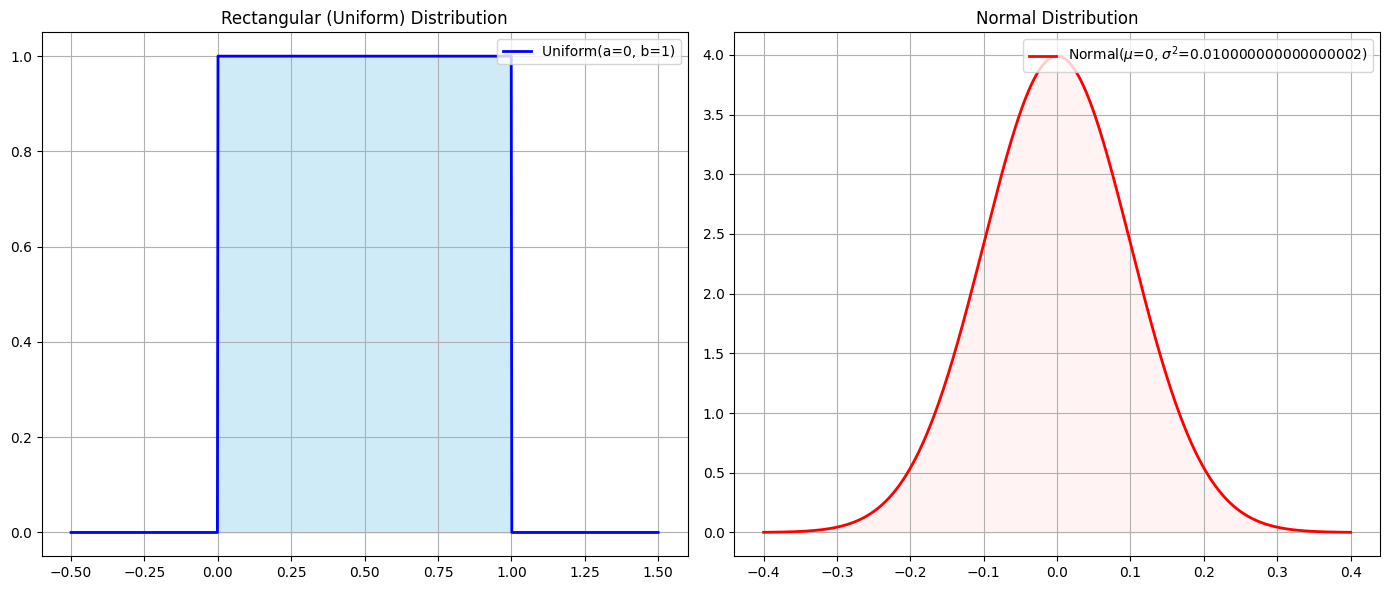

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Rectangular (Uniform) Distribution Parameters
a, b = 0, 1
x_unif = np.linspace(a - 0.5, b + 0.5, 1000)
y_unif = uniform.pdf(x_unif, loc=a, scale=b-a)

# Normal Distribution Parameters
mu, sigma = 0, 0.1
x_norm = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_norm = norm.pdf(x_norm, mu, sigma)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Rectangular Distribution
ax[0].plot(x_unif, y_unif, 'b-', lw=2, label=f'Uniform(a={a}, b={b})')
ax[0].fill_between(x_unif, y_unif, color='skyblue', alpha=0.4)
ax[0].legend(loc='upper right')
ax[0].set_title("Rectangular (Uniform) Distribution")
ax[0].grid(True)

# Plot Normal Distribution
ax[1].plot(x_norm, y_norm, 'r-', lw=2, label=f'Normal($\mu$={mu}, $\sigma^2$={sigma**2})')
ax[1].fill_between(x_norm, y_norm, color='mistyrose', alpha=0.4)
ax[1].legend(loc='upper right')
ax[1].set_title("Normal Distribution")
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [21]:
# Are both matrices the same??
random_1, random_2, random_1 == random_2



(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

## Shuffle the order of elements in a tensor

Why would you want to shuffle the order of these matrix elements?

**ANS**: The order in which the matrix elements are presented to the neural network *could* affect the results. For example, if you were doing an imaging project and you presented the neural network images in a certain order it might adjust the weights to the images of one of the images in particular. To avoid this catastrophe, you would ideally present to the neural network images in a random order!

In [22]:
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
not_shuffled.ndim



2

In [23]:

not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [24]:
# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

**Notice how the suffling occurs here. We are only changing the order of the rows**

In [25]:
tf.random.shuffle(not_shuffled, seed=42)



<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [26]:
tf.random.shuffle(not_shuffled, seed=42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [27]:
tf.random.shuffle(not_shuffled, seed=42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [28]:
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

**Notice we've set the seed yet we get different values even though we set the seed!!! What's going on????**

In [29]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)



<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

🛠 **Exercise** Read through TensorFlow documentation on random seed generation:
[link text](https://www.tensorflow.org/api_docs/python/tf/random/set_seed) and paractice writing 5 random tensor's and shuffle them. Here is a critical part of the text:

Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed.

Its interactions with operation-level seeds is as follows:

1. If neither the global seed nor the operation seed is set: A randomly picked seed is used for this op.
2. **If the global seed is set, but the operation seed is not**: The system deterministically picks an operation seed in conjunction with the global seed so that it gets a unique random sequence. Within the same version of tensorflow and user code, this sequence is deterministic. However across different versions, this sequence might change. If the code depends on particular seeds to work, specify both global and operation-level seeds explicitly.
3. If the <u>operation seed</u> is set, but the global seed is not set: A default global seed and the specified operation seed are used to determine the random sequence.
If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.

In [30]:
# Lets set a Global Seed
tf.random.set_seed(7)
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [31]:
tf.random.set_seed(7)
tf.random.shuffle(not_shuffled)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [32]:
tf.random.set_seed(7)
tf.random.shuffle(not_shuffled)



<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [33]:
tf.random.set_seed(7)
tf.random.shuffle(not_shuffled, seed=42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 3,  4]], dtype=int32)>

In [34]:
tf.random.set_seed(7)
tf.random.shuffle(not_shuffled, seed=42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 3,  4]], dtype=int32)>

In [35]:
tf.random.shuffle(not_shuffled, seed=42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [36]:
tf.random.shuffle(not_shuffled, seed=42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

** OK, I see that if the global seed is set, you will always get the same matrix, however if only the local seed is set- the <u>rows</u> will be shuffled (<u>the rules say that both the global and operational must be set for there to be the same matrix repeated</u>** 🛑 Exercise over.

In [37]:
tf.random.set_seed(42) #set global level random seed
tf.random.shuffle(not_shuffled, seed=42) #set operation level random seed



<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

> <u>Rule 4</u> **It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operational level random seed:**



### Other Ways To Make Tensors

In [38]:
tf.ones([10,7])


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [39]:
# Create a tensor of all zeros
tf.zeros(shape=(3,4))



<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy arrays into tensors

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster than numerical computing). Otherwise they are very similar.

In [40]:
# You can also turn numpy array's into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
numpy_A

# X = tf.constant(some_matrix) capital for matrix or tensor
# y = tf.constant(vector) non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [41]:
# above we get an array
A = tf.constant(numpy_A)
A
# below we get a tensor

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [42]:
A= tf.constant(numpy_A, shape=(2,3,4)) # 2 3x4 arrays
B = tf.constant(numpy_A)
A, B




(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [43]:
A = tf.constant(numpy_A, shape=(3,8))
B = tf.constant(numpy_A)
A, B


(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

### Getting Information from tensors

**When dealing with tensors you want to be aware of the following attributes:**

* Shape- The Length (number of elements) of each of the dimensions of a tensor               **command**:  tensor.shape
* Rank- The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n.         **command**:  tensor.ndim
* Axis or dimension- A particular dimension of a tensor.         **command**: tensor[0], tensor[:, 1]...
* Size- The total number of items in the tensor.                  **command**: tf.size(tensor)
                     


In [44]:
# Create a rank 4 tensor
rank_4_tensor = tf.zeros(shape=[2,3,4,5]) # 2 sets of matrices, 3 matrices per set, each matrix 4x5
rank_4_tensor


<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [45]:
rank_4_tensor[0] # we're getting the zeroth element of this


<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [46]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)



(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [47]:
# 120 elements??????
2*3*4*5

120

In [48]:
# Get various attributes of our tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0] )
print("Elements along the last axis:", rank_4_tensor.shape[-1] )
print("Total number of elements in our tensor:", tf.size(rank_4_tensor))

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: tf.Tensor(120, shape=(), dtype=int32)


In [49]:
# Get the first five elements of each dimension- remember I played with this
rank_4_tensor[:2, :1, :1, :1] # I interpret this [:2, :2, :2, :2]as there are 2 sets of matrices ans we are getting the values of the first two columns
# you can play with the numbers and you get different results


<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[0.]]],


       [[[0.]]]], dtype=float32)>

In [50]:
# Something to think about
rank_4_tensor_curve_ball = tf.zeros(shape=[2,3,4,5])
rank_4_tensor_curve_ball[:2, :3, :3, :3] == rank_4_tensor[:3, :3, :3, :3]


<tf.Tensor: shape=(2, 3, 3, 3), dtype=bool, numpy=
array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]],


       [[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]]])>

### Indexing Tensors


In [51]:
some_list = [1,2,3,4]
some_list[:2]


[1, 2]

In [52]:
# Get the first 2 elements of each dimension
rank_4_tensor[:3, :3, :2, :3]


<tf.Tensor: shape=(2, 3, 2, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

**when looking at tensors with the [x, y, z, a] notation, think outer(number of sets of matrices, number of matrices in set--> last two are row x column**

In [53]:
# Get the first element from each dimension except for from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [54]:
# IT SEEMS AS THOUGH TENSORS ARE NOT ZERO INDEXED
rank_4_tensor[:1, :3, :, :1]


<tf.Tensor: shape=(1, 3, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [55]:
from tensorflow.python.ops.gen_array_ops import rank
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7, 3],
                             [2, 5, 4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 3]), 2)

In [56]:
# Get the last item of each row of our rank 2 tensor
rank_2_tensor[:, -1]


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4], dtype=int32)>

In [57]:
rank_2_tensor

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[10,  7,  3],
       [ 2,  5,  4]], dtype=int32)>

### Insert another dimension.  ...== add every axis before the new one 😖

In [58]:
from tensorflow.python.framework.tensor_shape import Dimension
# Add in extra Dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor



<tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
array([[[10],
        [ 7],
        [ 3]],

       [[ 2],
        [ 5],
        [ 4]]], dtype=int32)>

In [59]:
### # Alternative way to add an extra dimension to our tensor
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis


<tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
array([[[10],
        [ 7],
        [ 3]],

       [[ 2],
        [ 5],
        [ 4]]], dtype=int32)>

In [60]:
tf.expand_dims(rank_2_tensor, axis=0) # expand the 0 axis


<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[10,  7,  3],
        [ 2,  5,  4]]], dtype=int32)>

In [61]:
rank_2_tensor

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[10,  7,  3],
       [ 2,  5,  4]], dtype=int32)>

### What I'm getting here is that i see more square brackets

> The rank (or order) of a tensor refers to the number of indices or dimensions required to specify any particular element within that tensor. It is analogous to the dimensionality of arrays in computer programming. Here's a breakdown:

* Rank 0 tensor: A scalar (a single number, e.g., 7)
* Rank 1 tensor: A vector (a one-dimensional array, e.g., [1, 2, 3])
* Rank 2 tensor: A matrix (a two-dimensional array)
* Rank 3 tensor: A three-dimensional array

... and so on.

In deep learning and many tensor libraries (like TensorFlow), when people talk about tensors, they usually mean entities that can be scalars, vectors, matrices, or higher-dimensional arrays. The rank of the tensor tells you how many axes or dimensions the tensor has. For instance, a rank 3 tensor might be used to represent RGB values for an image (height x width x color channels).
**rank_2_tensor has 2 square brackets, whereas rank 3 has 3 square brackets**

<u>Get it straight:</u>

two_dim_array = [

    [1, 2, 3],

    [4, 5, 6],

    [7, 8, 9]

]


3-D array- Think like this:

Layer 1:


| 1  2  3 |

| 4  5  6 |

| 7  8  9 |

Layer 2:


| 10 11 12 |

| 13 14 15 |

| 16 17 18 |


three_dim_array = [

    [

        [1, 2, 3],

        [4, 5, 6],

        [7, 8, 9]

    ],

    [

        [10, 11, 12],

        [13, 14, 15],

        [16, 17, 18]

    ]

]


> This helps make things clearer

In [62]:
tf.expand_dims(rank_2_tensor, axis=0) # "-1" means expand the 0-axis


<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[10,  7,  3],
        [ 2,  5,  4]]], dtype=int32)>

In [63]:
tf.expand_dims(rank_2_tensor, axis=1) # expand the 1-axis


<tf.Tensor: shape=(2, 1, 3), dtype=int32, numpy=
array([[[10,  7,  3]],

       [[ 2,  5,  4]]], dtype=int32)>

In [64]:
tf.expand_dims(rank_2_tensor, axis=-1) # expand the -1-axis



<tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
array([[[10],
        [ 7],
        [ 3]],

       [[ 2],
        [ 5],
        [ 4]]], dtype=int32)>

### Manipulating Tensors (Tensor Operations)

** Basic operations**

`+`, `-`, `*`, `/`

In [65]:
# You can add values to a tensor using the addition operator:
tensor = tf.constant([[10, 7],
                      [3, 4]])

tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [66]:
# IMPORTANT: Ortiginal tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [67]:
from os import W_OK
# Multiplication also W_OK
tensor * 10


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [68]:
# Subtraction if you want
tensor - 10


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [69]:
# We can use the tensorflow built-in function too:
tf.multiply(tensor, 10)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [70]:
# AGAIN: REMEMBER THAT YOU CAN DO ALL THESE OPERATIONS ON A TENSOR, BUT THE ORIGINAL TENSOR REMAINS THE SAME
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [71]:
tf.add(tensor, 10)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [72]:
tf.subtract(tensor, 10)



<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [73]:
tf.divide(tensor, 10)



<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 0.7],
       [0.3, 0.4]])>

### Matrix Multiplication

In Machine Learning, matrix multiplication is one of the most common tensor operations. Up unyil now we have been doing **element wise** operations, i.e. with addition you'd add 10 to *each* element.

![picture] (https://i.ytimg.com/vi/2spTnAiQg4M/mqdefault.jpg)

**What if I want to multiply two matrices together?**

<u>Remember that the shape of the matrices is important here</u>

*To multiply two matrices together: the dot product

![picture] (matrixmultiplication.xyz)

Here are some rules for the dot product of two vectors:

* The dot product is equal to the product of the magnitudes of the two vectors, and the cosine of the angle between them

* The dot product is also equal to the sum of the products of the corresponding components

* The dot product is also known as the inner product or scalar product

* The dot product of a vector with itself is the square of its magnitude

* The dot product is commutative, so a.b = b.a = ab cos θ

* If the dot product is zero, either one of the vectors is zero or the vectors are perpendicular to each other

* The angle between identical vectors is zero degrees, so their dot product is one

* The angle between two perpendicular vectors is 90 degrees, so their dot product is zero

* The dot product can be used to compare two vectors and understand the impact of repositioning one or both of them

* Remember the shapes have to correspond to get a dot product: **2** x 3 dot 3 x **2** will work, and so on

* we are multiplying matching members and summing them up

(1, 2, 3) dot (7, 9, 11) = 1x7 + 2x9 + 3x11




In [74]:
from tensorflow.python.ops.gen_math_ops import Mul
# Matrix Multiplication in TensorFlow
print(tensor)
tf.matmul(tensor, tensor)


tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [75]:
# Matrix Multiplication with Python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [76]:
# Create a tensor with shape (3, 2)
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])
# Create another tensor with shape (3, 2)
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y


(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [77]:
# Try to matrix multiply tensors of same shape DOES NOT WORK
X @ Y


InvalidArgumentError: ignored

📔 Resource for Dot Product: example of matrix multiplication
https://www.mathisfun.com/algebra/matrix-multiplying.html

**Remember**. The inner dimwnsions should match *AND* the resulting matrix has the shape of the **outer** dimensions

![picture] (image of alphabetical matrices)

In [78]:
# Let's change the shape of Y
tf.reshape(Y, shape=(2, 3))




<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [79]:
# Try to matrix multiply X by reshaped Y (notice how Y was reshaped)
X @ tf.reshape(Y, shape=(2, 3))



<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [80]:
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [81]:
# Here we just reshape X to accord to inner dimension rules
tf.matmul(tf.reshape(X, shape=(2, 3)), Y)



<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [82]:
# reshape just shuffles the numbers in the matrix
tf.reshape(X, shape=(2, 3)).shape, Y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [83]:
# Can do the same as with transpose- The transpose is literally the `transpose` of the matrix
X, tf.transpose(X), tf.reshape(X, shape=(2, 3))


(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [84]:
from tensorflow.python.ops.math_ops import mul
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

***The dot product**

Matrix multiplication is often referred to as the dot product

You can perform matrix multiplication using:

* `tf.matmul()`

* `tf.tensordot()`

In [85]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [86]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [87]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [88]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [89]:
# Check the values of Y, reshape Y and transposed Y
print("Normal Y:")
print(Y, "\n")

print("Y reshaped:")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))


Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped:
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [90]:
 tf.matmul(X, tf.transpose(Y))


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [91]:
import os
print(os.path.abspath("TensorFlow_fundamentals.ipynb"))



/content/TensorFlow_fundamentals.ipynb


**Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will transpose (rather than reshape) one of the tensors.**


### Changing the datatype of a tensor

<u>tf.cast</u>: The operation supports data types (for x and dtype) of uint8, uint16, uint32, uint64, int8, int16, int32, int64, float16, float32, float64, complex64, complex128, bfloat16. In case of casting from complex types (complex64, complex128) to real types, only the real part of x is returned. In case of casting from real types to complex types (complex64, complex128), the imaginary part of the returned value is set to 0. The handling of complex types here matches the behavior of numpy.

Note casting nan and inf values to integral types has undefined behavior.

Note this operation can lead to a loss of precision when converting native Python float and complex variables to tf.float64 or tf.complex128 tensors, since the input is first converted to the float32 data type and then widened. It is recommended to use tf.convert_to_tensor instead of tf.cast for any non-tensor inputs.



In [92]:
tf.__version__


'2.12.0'

In [93]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B.dtype


tf.float32

In [94]:
C = tf.constant([7, 10])
C.dtype


tf.int32

In [95]:
# Change from float32 to float16 (reduced precision) NOTE: you must change the variable to do this
D = tf.dtypes.cast(B, tf.float16)
D, D.dtype


(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [96]:
# Change from int32 to float32
E = tf.cast(C, tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

In [97]:
E = tf.cast(C, tf.float64)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 7., 10.])>, tf.float64)

Aggregating tensors

* Get the absolute values
* Get the square root
* Get the log

In [98]:
# Get the absolute values
D = tf.constant([-7, -10])
tf.abs(D)




<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

### Let's Go through the following forms of aggregation:

* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor


In [99]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E


<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([97,  1, 63, 96, 30, 97,  3, 92, 54, 18, 97, 76, 10, 96, 82, 70, 66,
       96, 52, 72, 58, 21, 22, 30, 32, 98, 67,  9, 92, 95, 40, 73, 43, 84,
       18, 53,  6, 28, 73, 97, 33, 19, 20, 30, 54, 70, 80, 54, 30, 86])>

In [100]:
 tf.size(E), E.shape, E.ndim


(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [101]:
# Find the minimum
tf.reduce_min(E)


<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [102]:
tf.reduce_max(E)


<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [103]:
tf.reduce_mean(E)


<tf.Tensor: shape=(), dtype=int64, numpy=55>

In [104]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2783>

🛠 **Exercise:** With what we've just learned, find the variance and standard deviation of our `E` tensor using Tensorflow methods

In [105]:
# Note here we have to cast E as a float is that in the examples everything was a float number in the tensor
tf.math.reduce_variance(tf.cast(E, tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=957.58435>

In [106]:
tf.math.reduce_std(tf.cast(E, tf.float32))






<tf.Tensor: shape=(), dtype=float32, numpy=30.94486>

### Find the positional maximum and minimum

In [107]:
from tensorflow._api.v2.math import maximum
# Find the np.positional maximum
tf.math.reduce_max(tf.cast(E, tf.float32))



<tf.Tensor: shape=(), dtype=float32, numpy=98.0>

In [108]:
# Find positional minimum
tf.math.reduce_min(tf.cast(E, tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### My question for the above is that we obviously need more precision when reporting the variance and the standard deviation, is this bevause these are so often used in things like regression, stats?????

In [109]:
# Create a new tensor for finding positional minimum and maximum (set seed so we all have the same numbers)
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F


<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [110]:
# Find the positional   F[i]
tf.argmax(F)



<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [111]:
# Index on our largest value position
F[tf.argmax(F)]


<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [112]:
# Find the max value of F
tf.reduce_max(F)



<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [113]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)



<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [114]:
# Find the positional minimum
tf.argmin(F)


<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [115]:
# Find the minimum using the positional minimum index
F[tf.argmin(F)]



<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Sqeezing a tensor (reshaping it)


In [116]:
# Create a tensor to get started- Here we have 5 brackets
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [117]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [118]:
# Notice that the number of brackets has reduced to 1
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape


(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### One-hot encoding tensors, e.g. encode red, green, blue

In [119]:
 # Create a list of indices
some_list = [0, 1, 2, 3] # could be red, green, blue, purple

# One hot encode our list of indices
tf.one_hot(some_list, depth=4)



<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [120]:
from tensorflow.python.ops import custom_gradient
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="yo! I love deep learning", off_value="gimmie that guitar")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'yo! I love deep learning', b'gimmie that guitar',
        b'gimmie that guitar', b'gimmie that guitar'],
       [b'gimmie that guitar', b'yo! I love deep learning',
        b'gimmie that guitar', b'gimmie that guitar'],
       [b'gimmie that guitar', b'gimmie that guitar',
        b'yo! I love deep learning', b'gimmie that guitar'],
       [b'gimmie that guitar', b'gimmie that guitar',
        b'gimmie that guitar', b'yo! I love deep learning']], dtype=object)>

### Sqaring, log, square root

In [121]:
# Create a new tensor
H = tf.range(1, 10)
H


<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [122]:
# Square it
tf.square(H)


<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [123]:
# Find the square root
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [124]:
# Find the log
tf.math.log(tf.cast(H, dtype=tf.float32))


<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and NumPy

Tensorflow interacts with NumPy arrays

🔒**Note**: One of the main differences between TensirFlow and NumPy array is that tf tensors are float 32 vs numpy float 64

In [125]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J


<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [126]:
# Convert tensor J to NumPy with np.array() 3 ways:
import numpy as np
np.array(J)

array([ 3.,  7., 10.])

In [127]:
np.array(J), type(np.array(J))


(array([ 3.,  7., 10.]), numpy.ndarray)

In [128]:
J.numpy(), type(J.numpy())


(array([ 3.,  7., 10.]), numpy.ndarray)

In [129]:
# This might be useful in the following condition(s)
J = tf.constant([3.])
J.numpy()[0]

3.0

In [130]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])

# Check the datatypes of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)